# Problem Statement
The goal is to understand the relationship between house features and how these variables affect the house price. Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model. 
Link to access dataset
https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvo-XtK9sYAAma6FW0la?dl=0

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

#### Read Data From Excel File

In [3]:
df= pd.read_excel(r"D:\DSA UpgradCampus\Shack Labs\DS - Assignment Part 1 data set.xlsx")

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
df.shape

(414, 9)

In [7]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


#### Transaction Date format is not acceptable to analyze further. Year from Transaction date column is extracted to new column Transaction year and column Transactio date is removed. 

In [8]:
df["Transaction date"]= df["Transaction date"].astype(str)
df["Transaction date"].info()

df["Transaction year"]= df["Transaction date"].apply(lambda x: x.split(".")[0])
df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 414 entries, 0 to 413
Series name: Transaction date
Non-Null Count  Dtype 
--------------  ----- 
414 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction year
0,2012.9166667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,2012.9166667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,2013.5833333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,2013.5,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,2012.8333333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


In [9]:
df["Transaction year"].astype('int32')

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: Transaction year, Length: 414, dtype: int32

In [10]:
df.drop('Transaction date', axis=1, inplace= True)
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


In [11]:
df["Price"]=df["House size (sqft)"]*df["House price of unit area"]

In [12]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction year,Price
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012,21162.1


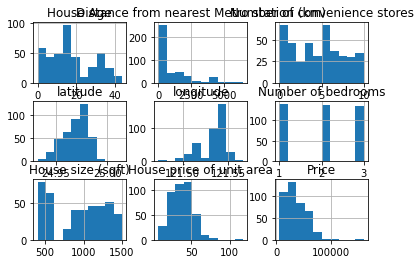

In [13]:
df.hist()
plt.show()

In [14]:
df.Price.describe()

count       414.000000
mean      35597.804106
std       19890.892075
min        5440.400000
25%       20482.700000
50%       31224.200000
75%       48439.375000
max      161327.500000
Name: Price, dtype: float64

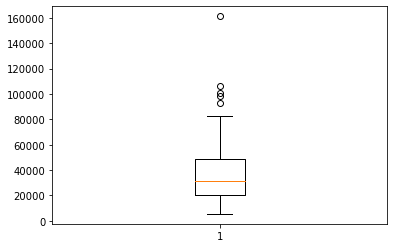

In [15]:
plt.boxplot(df.Price)
plt.show()

#### From above we can infer data, the data does not have null values and all the values are in Standardised form

In [16]:
df["Number of bedrooms"].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

#### Number of houses for each bedroom type are almost equal. Now let us see the variation of house price based on number of bedrooms

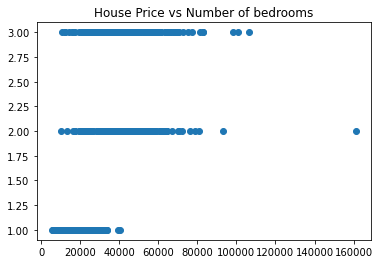

In [17]:
plt.scatter(df["Price"],df["Number of bedrooms"])
plt.title("House Price vs Number of bedrooms")
plt.show()


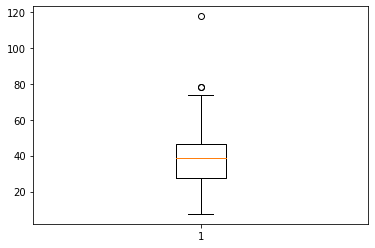

In [18]:
plt.boxplot(df["House price of unit area"])
plt.show()

In [19]:
df.loc[df["House price of unit area"]>80]

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction year,Price
270,10.8,252.5822,1,24.9746,121.53046,2,1373,117.5,2013,161327.5


#### This entry seems to be an outlier without any explanatory reason. So, it is better to remove this entry 

In [20]:
df.drop(df[(df["House price of unit area"]>80)].index, axis=0, inplace= True)

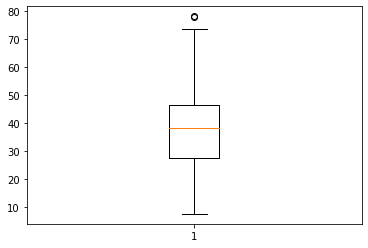

In [21]:
plt.boxplot(df["House price of unit area"])
plt.show()

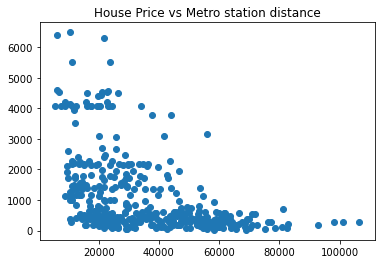

In [22]:


plt.scatter(df["Price"],df["Distance from nearest Metro station (km)"])
plt.title("House Price vs Metro station distance")
plt.show()

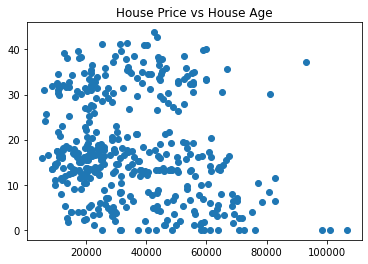

In [23]:
plt.scatter(df["Price"],df["House Age"])
plt.title("House Price vs House Age")
plt.show()

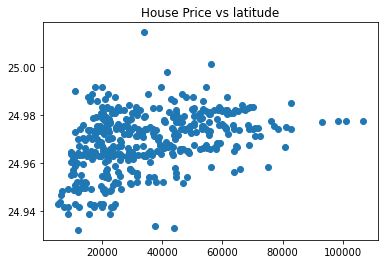

In [24]:


plt.scatter(df["Price"],df["latitude"])
plt.title("House Price vs latitude")
plt.show()

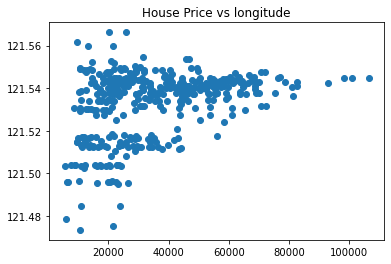

In [25]:
plt.scatter(df["Price"],df["longitude"])
plt.title("House Price vs longitude")
plt.show()

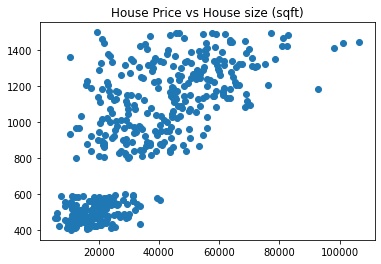

In [26]:
plt.scatter(df["Price"],df["House size (sqft)"])
plt.title("House Price vs House size (sqft)")
plt.show()

In [27]:
df["House size (sqft)"].describe()

count     413.000000
mean      930.406780
std       348.653908
min       402.000000
25%       548.000000
50%       975.000000
75%      1234.000000
max      1500.000000
Name: House size (sqft), dtype: float64

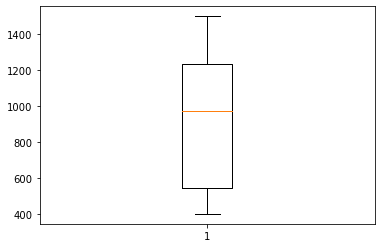

In [28]:
plt.boxplot(df["House size (sqft)"])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [37]:
labels = df['Price']
conv_dates = [1 if values == 2013 else 0 for values in df["Transaction year"] ]
df['Transaction year'] = conv_dates
train1 = df.drop(['Price'],axis=1)


In [38]:
from sklearn.model_selection import train_test_split

In [49]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [50]:




reg.fit(x_train,y_train)

LinearRegression()

In [51]:


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [52]:

reg.score(x_test,y_test)

0.940014132311713